In [2]:
import matplotlib.animation as animation
from matplotlib import rc
from IPython.display import HTML, Image
from ipywidgets import interact,Dropdown,IntSlider,FloatRangeSlider, FloatSlider, RadioButtons
rc('animation', html='html5')
styles = ["white","dark",'whitegrid',"darkgrid"]
contexts = ['paper','talk','poster','notebook']
import gc, argparse, sys, os, errno
%pylab inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
plt.style.use('ggplot')
import seaborn as sns
sns.set()
import h5py
import os
from tqdm import tqdm
import scipy
import sklearn
from scipy.stats import pearsonr
import warnings
warnings.filterwarnings('ignore')

Populating the interactive namespace from numpy and matplotlib


In [3]:
colorsgallery = np.array([(31, 119, 180), (174, 199, 232), (255, 127, 14), (255, 187, 120),  
             (44, 160, 44), (152, 223, 138), (214, 39, 40), (255, 152, 150),  
             (148, 103, 189), (197, 176, 213), (140, 86, 75), (196, 156, 148),  
             (227, 119, 194), (247, 182, 210), (127, 127, 127), (199, 199, 199),  
             (188, 189, 34), (219, 219, 141), (23, 190, 207), (158, 218, 229),
            (240,128,128),(233,150,122),(250,128,114),(255,160,122),
            (50,205,50),(144,238,144),(152,251,152),(143,188,143),
            (0,250,154),(0,255,127),(102,205,170),(60,179,113),
            (70,130,180),(100,149,237),(0,191,255),(30,144,255),
            (173,216,230),(135,206,235),(199,21,133),(219,112,147),
            (255,20,147),(255,105,180),(255,182,193),(255,192,203),(250,235,215)])/255.

In [4]:
colorsgallery.shape

(45, 3)

In [5]:
pwd

u'/Users/james/NMJ'

In [12]:
np.unique(scipy.misc.imread('seeding7.18/mask1seed18.vsseg_export_s300.png'),return_counts=True)

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19, 20, 21], dtype=uint8),
 array([2909814,       3,      24,      24,      87,      33,      36,
              6,       9,      96,      45,      30,      24,      12,
             27,      57,      45,      75,      45,      69,      87,
             72]))

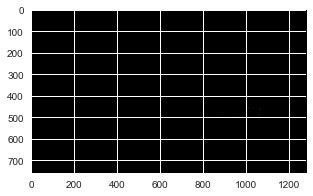

In [13]:
fig,ax=plt.subplots(1,figsize=(6,3))
imshow(scipy.misc.imread('seeding7.18/mask1seed18.vsseg_export_s010.png'))

In [15]:
pwd

u'/Users/james/NMJ'

In [21]:
len(os.listdir('seeding7.18'))

292

In [41]:
def listdir_nohidden(path):
    filelist = []
    for f in os.listdir(path):
        if not f.startswith('.'):
            filelist.append(f)
    return filelist

In [42]:
filetest = listdir_nohidden('seeding7.18')

In [45]:
imagedata = {}
for i in range(len(filetest)):
    imagedata[i] = scipy.misc.imread("seeding7.18/"+filetest[i])

In [92]:
xlim,ylim = imagedata[0][:,:,0].shape

In [46]:
uniqueind = np.unique(imagedata[0].reshape(-1,3),axis=0)

In [107]:
maxpixelvalue = np.max([np.unique(imagedata[i].reshape(-1,3),axis=0).shape[0] for i in tqdm(range(len(filetest)))])

100%|██████████| 291/291 [00:48<00:00,  5.96it/s]


In [108]:
maxpixelvalue

22

In [48]:
np.unique(imagedata[0].reshape(-1,3),return_counts=True,axis=0)

(array([[ 0,  0,  0],
        [ 1,  1,  1],
        [ 2,  2,  2],
        [ 3,  3,  3],
        [ 4,  4,  4],
        [ 5,  5,  5],
        [ 6,  6,  6],
        [ 7,  7,  7],
        [ 8,  8,  8],
        [ 9,  9,  9],
        [10, 10, 10],
        [11, 11, 11],
        [12, 12, 12],
        [13, 13, 13],
        [14, 14, 14],
        [15, 15, 15],
        [16, 16, 16],
        [17, 17, 17],
        [18, 18, 18],
        [19, 19, 19],
        [20, 20, 20],
        [21, 21, 21]], dtype=uint8),
 array([970090,      8,     15,      8,      8,      6,      8,      3,
             3,      7,      8,      6,      6,      4,      6,      6,
             9,      7,      7,     13,      6,      6]))

In [49]:
np.unique(np.sum(imagedata[0].reshape(-1,3),axis=1),return_counts=True)

(array([ 0,  3,  6,  9, 12, 15, 18, 21, 24, 27, 30, 33, 36, 39, 42, 45, 48,
        51, 54, 57, 60, 63], dtype=uint64),
 array([970090,      8,     15,      8,      8,      6,      8,      3,
             3,      7,      8,      6,      6,      4,      6,      6,
             9,      7,      7,     13,      6,      6]))

In [50]:
def transform_rgb(img):
    num = np.unique(img.reshape(-1,3),axis=0).shape[0]
    #print (num)
    #rgbarr = np.ndarray([num*3])
    #for i in range(num*3):
      #  rgbarr[i] = np.random.uniform(0,1)
    #rgbarr = rgbarr.reshape(-1,3)
    image = np.zeros([img.shape[0]*img.shape[1],3])
    sumimg = np.sum(img.reshape(-1,3),axis=1)
    uniqueind = np.unique(img.reshape(-1,3),axis=0)
    for i in np.arange(0,num-1):
        image[sumimg==3*(uniqueind[i][0]+1)] = colorsgallery[i]
    #print (sumimg.shape)
    image[sumimg==0] = [1,1,1]
    return image.reshape(img.shape[0],img.shape[1],3)

In [141]:
def transform_single_pix(img):
    num = np.unique(imagedata.reshape(-1,3),axis=0).shape[0]
    #print (num)
    rgbarr = np.zeros([num])
    for i in range(num):
        rgbarr[i] = np.random.uniform(0,1)
    
    image = np.zeros([img.shape[0]*img.shape[1],1]).reshape(-1,1)
    sumimg = np.sum(img.reshape(-1,3),axis=1)
    #print (rgbarr.shape,image.shape,sumimg.shape)
    for i in np.arange(1,num):
        image[sumimg==3*uniqueind[i][0]] = rgbarr[i-1]
    #print (image.shape,img.shape)
    #print (sumimg.shape)
    return image.reshape(img.shape[0],img.shape[1])

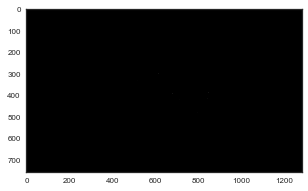

In [83]:
fig,ax=plt.subplots(1,figsize=(6,3))
ax.imshow(imagedata[0])

In [82]:
sns.set_context(contexts[0])
sns.set_style(styles[0])

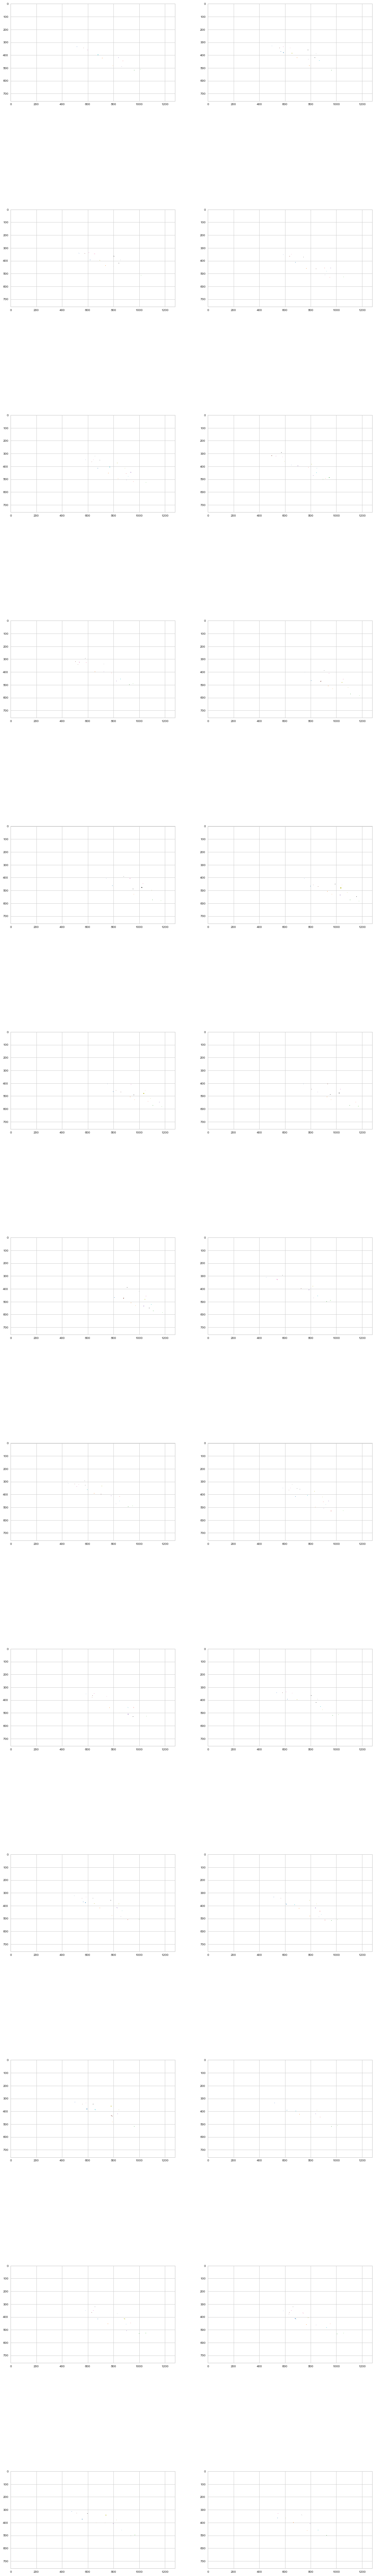

In [55]:
sizefact=10
fig,ax=plt.subplots(13,2,figsize=(16,12*sizefact))
for i in range(13):
    for j in range(2):
        ax[i,j].imshow(transform_rgb(imagedata[i*2+j]))

In [64]:
uniqueind[1]

array([1, 1, 1], dtype=uint8)

In [67]:
#find one pixel is enough
np.where(imagedata[0][:,:,0] ==uniqueind[1][0])[0][0]  #1 could be changed to range(1,uniqueind.shape[0])

391

In [71]:
for i in range(1,uniqueind.shape[0]):
    print np.where(imagedata[0][:,:,0] ==uniqueind[i][0])[0][0],np.where(imagedata[0][:,:,0] ==uniqueind[i][0])[1][0]

391 614
333 513
422 711
481 795
516 963
509 1009
513 913
510 917
418 840
489 864
443 800
344 569
359 599
335 597
345 648
301 611
360 793
389 847
395 679
471 885
444 873


In [103]:
uniqueind[1:].shape[0]

21

In [109]:
colors = cm.rainbow(np.linspace(0, 1, maxpixelvalue-1))

In [132]:
np.isin(np.arange(0,5),np.arange(1,maxpixelvalue))

array([False,  True,  True,  True,  True])

In [195]:
def plot_scatter_seed(img,width,height,saveind=0,save=False):
    fig,ax1 = plt.subplots(1,figsize=(width,height))
    uniind = np.unique(img.reshape(-1,3),axis=0)
    seedarr = np.ndarray([uniind.shape[0]-1,2])
    for i in range(1,uniind.shape[0]):
         seedarr[i-1] = np.where(img[:,:,0] ==uniind[i][0])[0][0],np.where(img[:,:,0] ==uniind[i][0])[1][0]
    #print (seedarr[:,1].shape[0],uniind[1:].shape[0],colors.shape)
    assert seedarr[:,1].shape[0] == uniind[1:].shape[0]
    #xticks, yticks,nums = seedarr[:,0],seedarr[:,1],uniind[1:].shape[0]
    xticks, yticks = seedarr[:,0],seedarr[:,1]
    #print (np.arange(0,21)[np.isin(np.arange(1,maxpixelvalue),uniind[1:][:,0])])
    needcolor=colors[np.arange(0,21)[np.isin(np.arange(1,maxpixelvalue),uniind[1:][:,0])]]
    
    #colors = cm.rainbow(np.linspace(0, 1, len(yticks)))
    #for x,y, c in zip(xticks,yticks, needcolor):
    #im = ax1.scatter(x, y, color=c)
    im = ax1.scatter(xticks,yticks, c= needcolor,s=20)
    ax1.set_xlim(0,xlim)
    ax1.set_ylim(0,ylim)
    if save:
        savefig('seeding7.18/animation'+str("%03d" % saveind))
    else:
        return im

In [ ]:
savenum = 4#len(filetest)
for i in range(4,100):
    plot_scatter_seed(imagedata[i],16,12,i,True)

In [ ]:
ffmpeg -framerate 1/2 -i animation%03d.png -c:v libx264 -r 5 animationout.mp4

In [206]:
def scatter_seed(img):
    uniind = np.unique(img.reshape(-1,3),axis=0)
    seedarr = np.ndarray([uniind.shape[0]-1,2])
    for i in range(1,uniind.shape[0]):
         seedarr[i-1] = np.where(img[:,:,0] ==uniind[i][0])[0][0],np.where(img[:,:,0] ==uniind[i][0])[1][0]
    #print (seedarr[:,1].shape[0],uniind[1:].shape[0],colors.shape)
    assert seedarr[:,1].shape[0] == uniind[1:].shape[0]
    #xticks, yticks,nums = seedarr[:,0],seedarr[:,1],uniind[1:].shape[0]
    needcolor=colors[np.arange(0,21)[np.isin(np.arange(1,maxpixelvalue),uniind[1:][:,0])]]
    return seedarr[:,0],seedarr[:,1],uniind[1:].shape[0],needcolor

In [200]:
scatter_seed(imagedata[0])

(array([391., 333., 422., 481., 516., 509., 513., 510., 418., 489., 443.,
        344., 359., 335., 345., 301., 360., 389., 395., 471., 444.]),
 array([ 614.,  513.,  711.,  795.,  963., 1009.,  913.,  917.,  840.,
         864.,  800.,  569.,  599.,  597.,  648.,  611.,  793.,  847.,
         679.,  885.,  873.]),
 21)

In [201]:
repeat(1,20)

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1])

In [249]:
xlistarr, ylistarr, zlistarr,needcolor = np.array([]).astype('int'),np.array([]).astype('int'),np.array([]).astype('int'),np.array([])
for i in tqdm(range( len(filetest) )):  #len(filetest)
    tmpx,tmpy,tmpnum,tmpcolor = scatter_seed(imagedata[i])
    xlistarr = np.concatenate((xlistarr,tmpx)).astype('int')
    ylistarr = np.concatenate((ylistarr,tmpy)).astype('int')
    zlistarr = np.concatenate((zlistarr,np.repeat(i,tmpnum))).astype('int')
    needcolor = np.concatenate((needcolor,tmpcolor.ravel()))

100%|██████████| 291/291 [01:28<00:00,  3.30it/s]


array([391, 333, 422, ..., 404, 479, 455])

In [247]:
from mpl_toolkits.mplot3d import Axes3D

def plot_3d(azim,elev,width,height):

    fig = plt.figure(figsize=(width,height))
    ax = fig.add_subplot(111, projection='3d')


    # For each set of style and range settings, plot n random points in the box
    # defined by x in [23, 32], y in [0, 100], z in [zlow, zhigh].
    ax.scatter(xlistarr,ylistarr,zlistarr,c=needcolor.reshape(-1,4))
    ax.view_init(azim=azim,elev=elev)

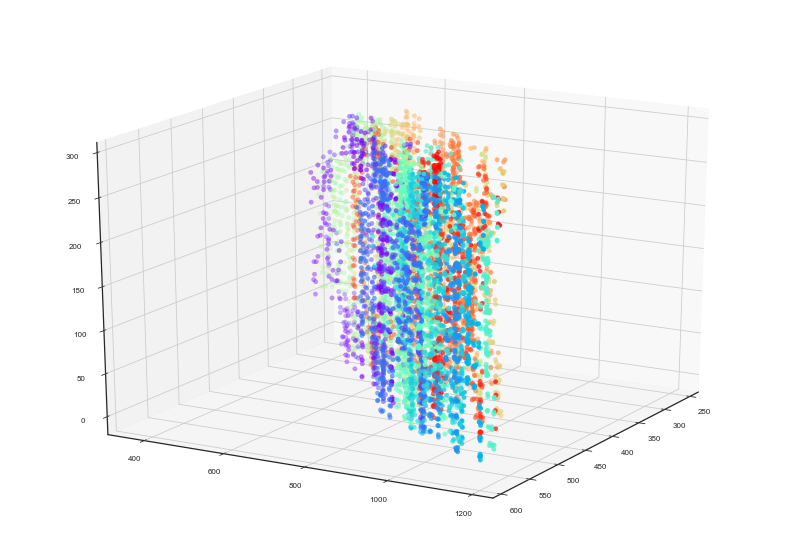

In [252]:
plot_3d(30,20,14,10)